In [96]:
# Core Python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Machine Learning libraries
import sklearn  # (No short name – we import submodules separately when needed)
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Deep Learning libraries
import keras

# NLP libraries
import nltk


# I was not able to import "torch", "import tensorflow as tf" and "from transformers import pipeline" so I have skipped it for now

In [2]:
df = pd.read_csv(r'C:\Users\vinay\Desktop\Meningitis\Dataset\Meningitis data.csv')

In [49]:
df1 = df.copy()

In [50]:
df1

,Patient_ID,Age,Gender,WBC_Count,Protein_Level,Glucose_Level,Pathogen_Present,Diagnosis,Outcome,Hemoglobin,WBC_Blood_Count,Platelets,CRP_Level,Risk_Level
0,1,66,Female,14450,179,19,Yes,Bacterial,Recovered,3,13912,119405,45,High Risk
1,2,94,Male,13470,122,104,No,Bacterial,Recovered,16,6845,213495,44,Moderate Risk
2,3,23,Male,8921,20,66,No,Viral,Recovered,18,4049,217301,5,Low Risk
3,4,53,Female,16200,145,16,Yes,Bacterial,Recovered,1,17731,119570,44,High Risk
4,5,47,Female,4781,43,58,No,Viral,Recovered,14,5086,259521,0,Low Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,1196,25,Male,16643,192,36,Yes,Bacterial,Recovered,3,12292,126986,21,High Risk
1196,1197,41,Female,15183,134,10,Yes,Bacterial,Recovered,3,19784,131735,28,High Risk
1197,1198,47,Male,4454,20,50,No,Viral,Recovered,16,6362,354948,0,Low Risk
1198,1199,44,Male,14632,114,19,Yes,Bacterial,Recovered,2,12592,120923,33,High Risk


In [51]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Patient_ID        1200 non-null   int64 
 1   Age               1200 non-null   int64 
 2   Gender            1200 non-null   object
 3   WBC_Count         1200 non-null   int64 
 4   Protein_Level     1200 non-null   int64 
 5   Glucose_Level     1200 non-null   int64 
 6   Pathogen_Present  1200 non-null   object
 7   Diagnosis         1200 non-null   object
 8   Outcome           1200 non-null   object
 9   Hemoglobin        1200 non-null   int64 
 10  WBC_Blood_Count   1200 non-null   int64 
 11  Platelets         1200 non-null   int64 
 12  CRP_Level         1200 non-null   int64 
 13  Risk_Level        1200 non-null   object
dtypes: int64(9), object(5)
memory usage: 131.4+ KB


In [52]:
df1.describe()

,Patient_ID,Age,WBC_Count,Protein_Level,Glucose_Level,Hemoglobin,WBC_Blood_Count,Platelets,CRP_Level
count,1200.000000,1200.00000,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000
mean,600.500000,45.24750,11842.602500,101.002500,52.55750,9.653333,11720.409167,196849.476667,24.575000
std,346.554469,21.82246,5370.192798,68.895268,36.47518,5.567374,4911.127424,91320.569325,22.778061
min,1.000000,0.00000,2008.000000,2.000000,0.00000,1.000000,4022.000000,100088.000000,0.000000
25%,300.750000,29.00000,7052.750000,39.000000,23.00000,5.000000,7225.750000,123773.750000,3.000000
50%,600.500000,41.00000,11834.500000,101.000000,53.00000,8.000000,12454.500000,148116.000000,25.000000
75%,900.250000,57.00000,16434.000000,155.000000,67.00000,15.000000,16077.750000,266625.750000,40.000000
max,1200.000000,119.00000,24717.000000,299.000000,148.00000,18.000000,19991.000000,399479.000000,99.000000


In [53]:
null_counts = df1.isnull().sum()
print(null_counts)

Patient_ID          0
Age                 0
Gender              0
WBC_Count           0
Protein_Level       0
Glucose_Level       0
Pathogen_Present    0
Diagnosis           0
Outcome             0
Hemoglobin          0
WBC_Blood_Count     0
Platelets           0
CRP_Level           0
Risk_Level          0
dtype: int64


In [54]:
data_types = df1.dtypes
print(data_types)

Patient_ID           int64
Age                  int64
Gender              object
WBC_Count            int64
Protein_Level        int64
Glucose_Level        int64
Pathogen_Present    object
Diagnosis           object
Outcome             object
Hemoglobin           int64
WBC_Blood_Count      int64
Platelets            int64
CRP_Level            int64
Risk_Level          object
dtype: object


In [55]:
value_counts = {col: df1[col].value_counts() if df1[col].dtype == 'object' else None 
                for col in df1.columns}

print(value_counts)

{'Patient_ID': None, 'Age': None, 'Gender': Gender
Female    607
Male      593
Name: count, dtype: int64, 'WBC_Count': None, 'Protein_Level': None, 'Glucose_Level': None, 'Pathogen_Present': Pathogen_Present
Yes    631
No     569
Name: count, dtype: int64, 'Diagnosis': Diagnosis
Bacterial    595
Viral        538
Unknown       67
Name: count, dtype: int64, 'Outcome': Outcome
Recovered    1076
Deceased      124
Name: count, dtype: int64, 'Hemoglobin': None, 'WBC_Blood_Count': None, 'Platelets': None, 'CRP_Level': None, 'Risk_Level': Risk_Level
High Risk        593
Low Risk         540
Moderate Risk     67
Name: count, dtype: int64}


In [56]:
numerical_cols = ['Age', 'WBC_Count', 'Protein_Level', 'Glucose_Level', 'Hemoglobin', 'WBC_Blood_Count', 'Platelets', 'CRP_Level']
categorical_cols = ['Gender', 'Pathogen_Present', 'Diagnosis', 'Outcome', 'Risk_Level']

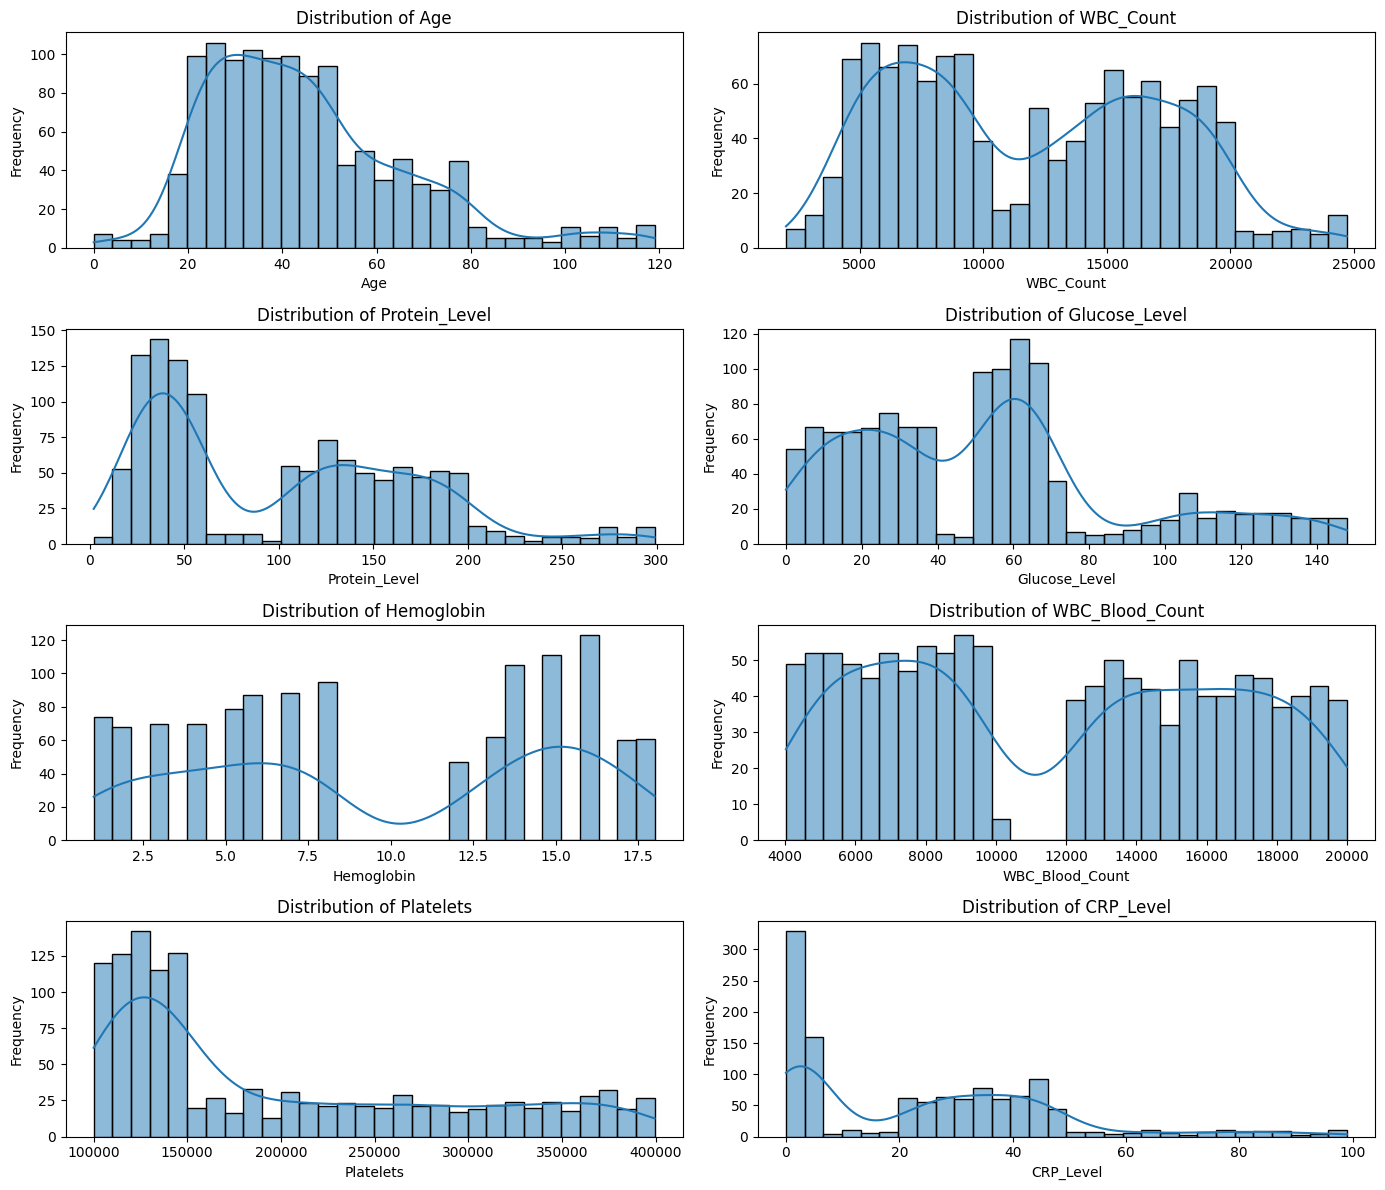

In [57]:
plt.figure(figsize=(14, 12))

for i, col in enumerate (numerical_cols,1):
    plt.subplot(4, 2, i)
    sns.histplot(df1[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()

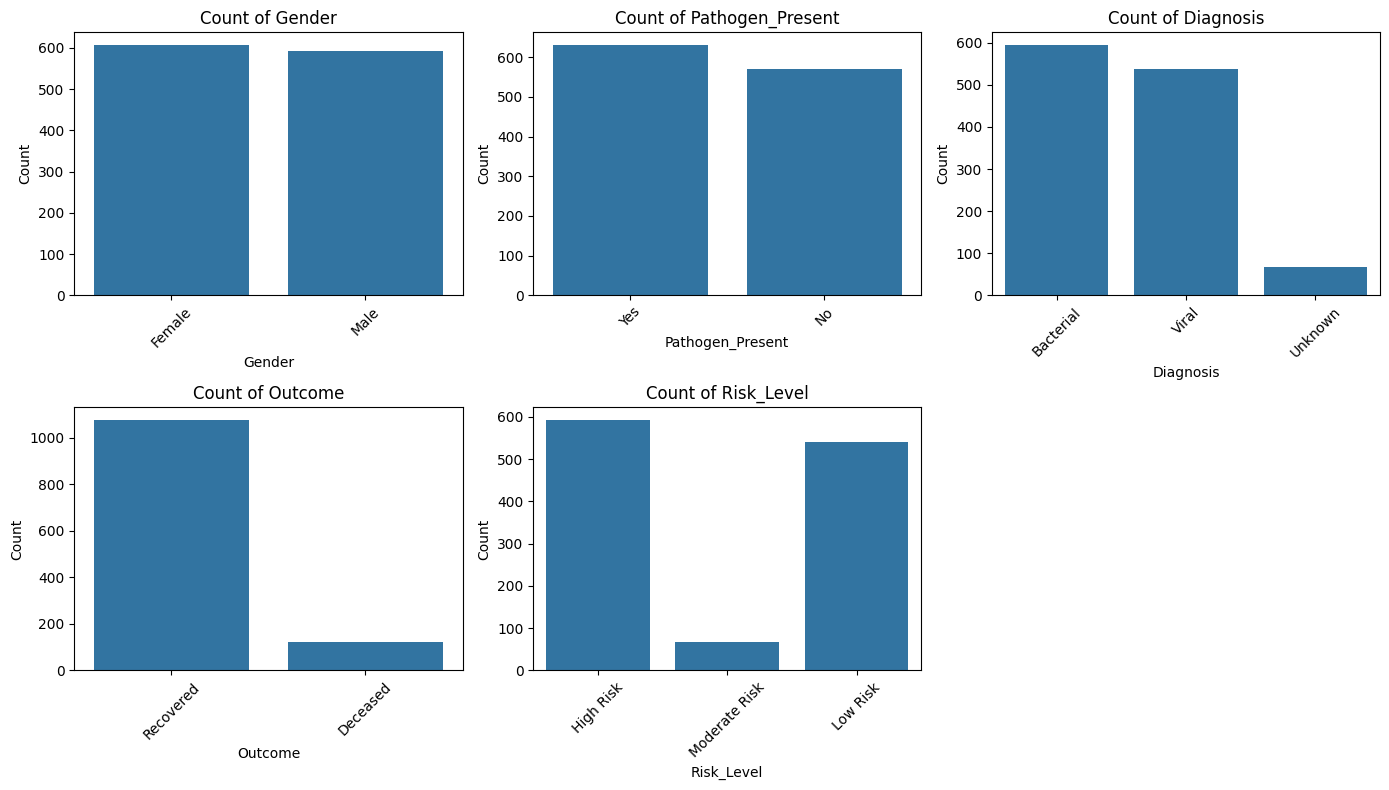

In [58]:
plt.figure(figsize=(14, 8))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df1, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [61]:
df2 = df1.copy()

for col in numerical_cols:
    cap_value = np.percentile(df2[col], 98)
    df2[col] = np.where(df2[col] > cap_value, cap_value, df2[col])

In [68]:
compare_summary = {
    'Original Max': df1[numerical_cols].max(),
    'Capped Max': df2[numerical_cols].max()
}

print(compare_summary)

{'Original Max': Age                   119
WBC_Count           24717
Protein_Level         299
Glucose_Level         148
Hemoglobin             18
WBC_Blood_Count     19991
Platelets          399479
CRP_Level              99
dtype: int64, 'Capped Max': Age                   108.02
WBC_Count           22392.84
Protein_Level         273.02
Glucose_Level         141.02
Hemoglobin             18.00
WBC_Blood_Count     19721.28
Platelets          391630.16
CRP_Level              86.04
dtype: float64}


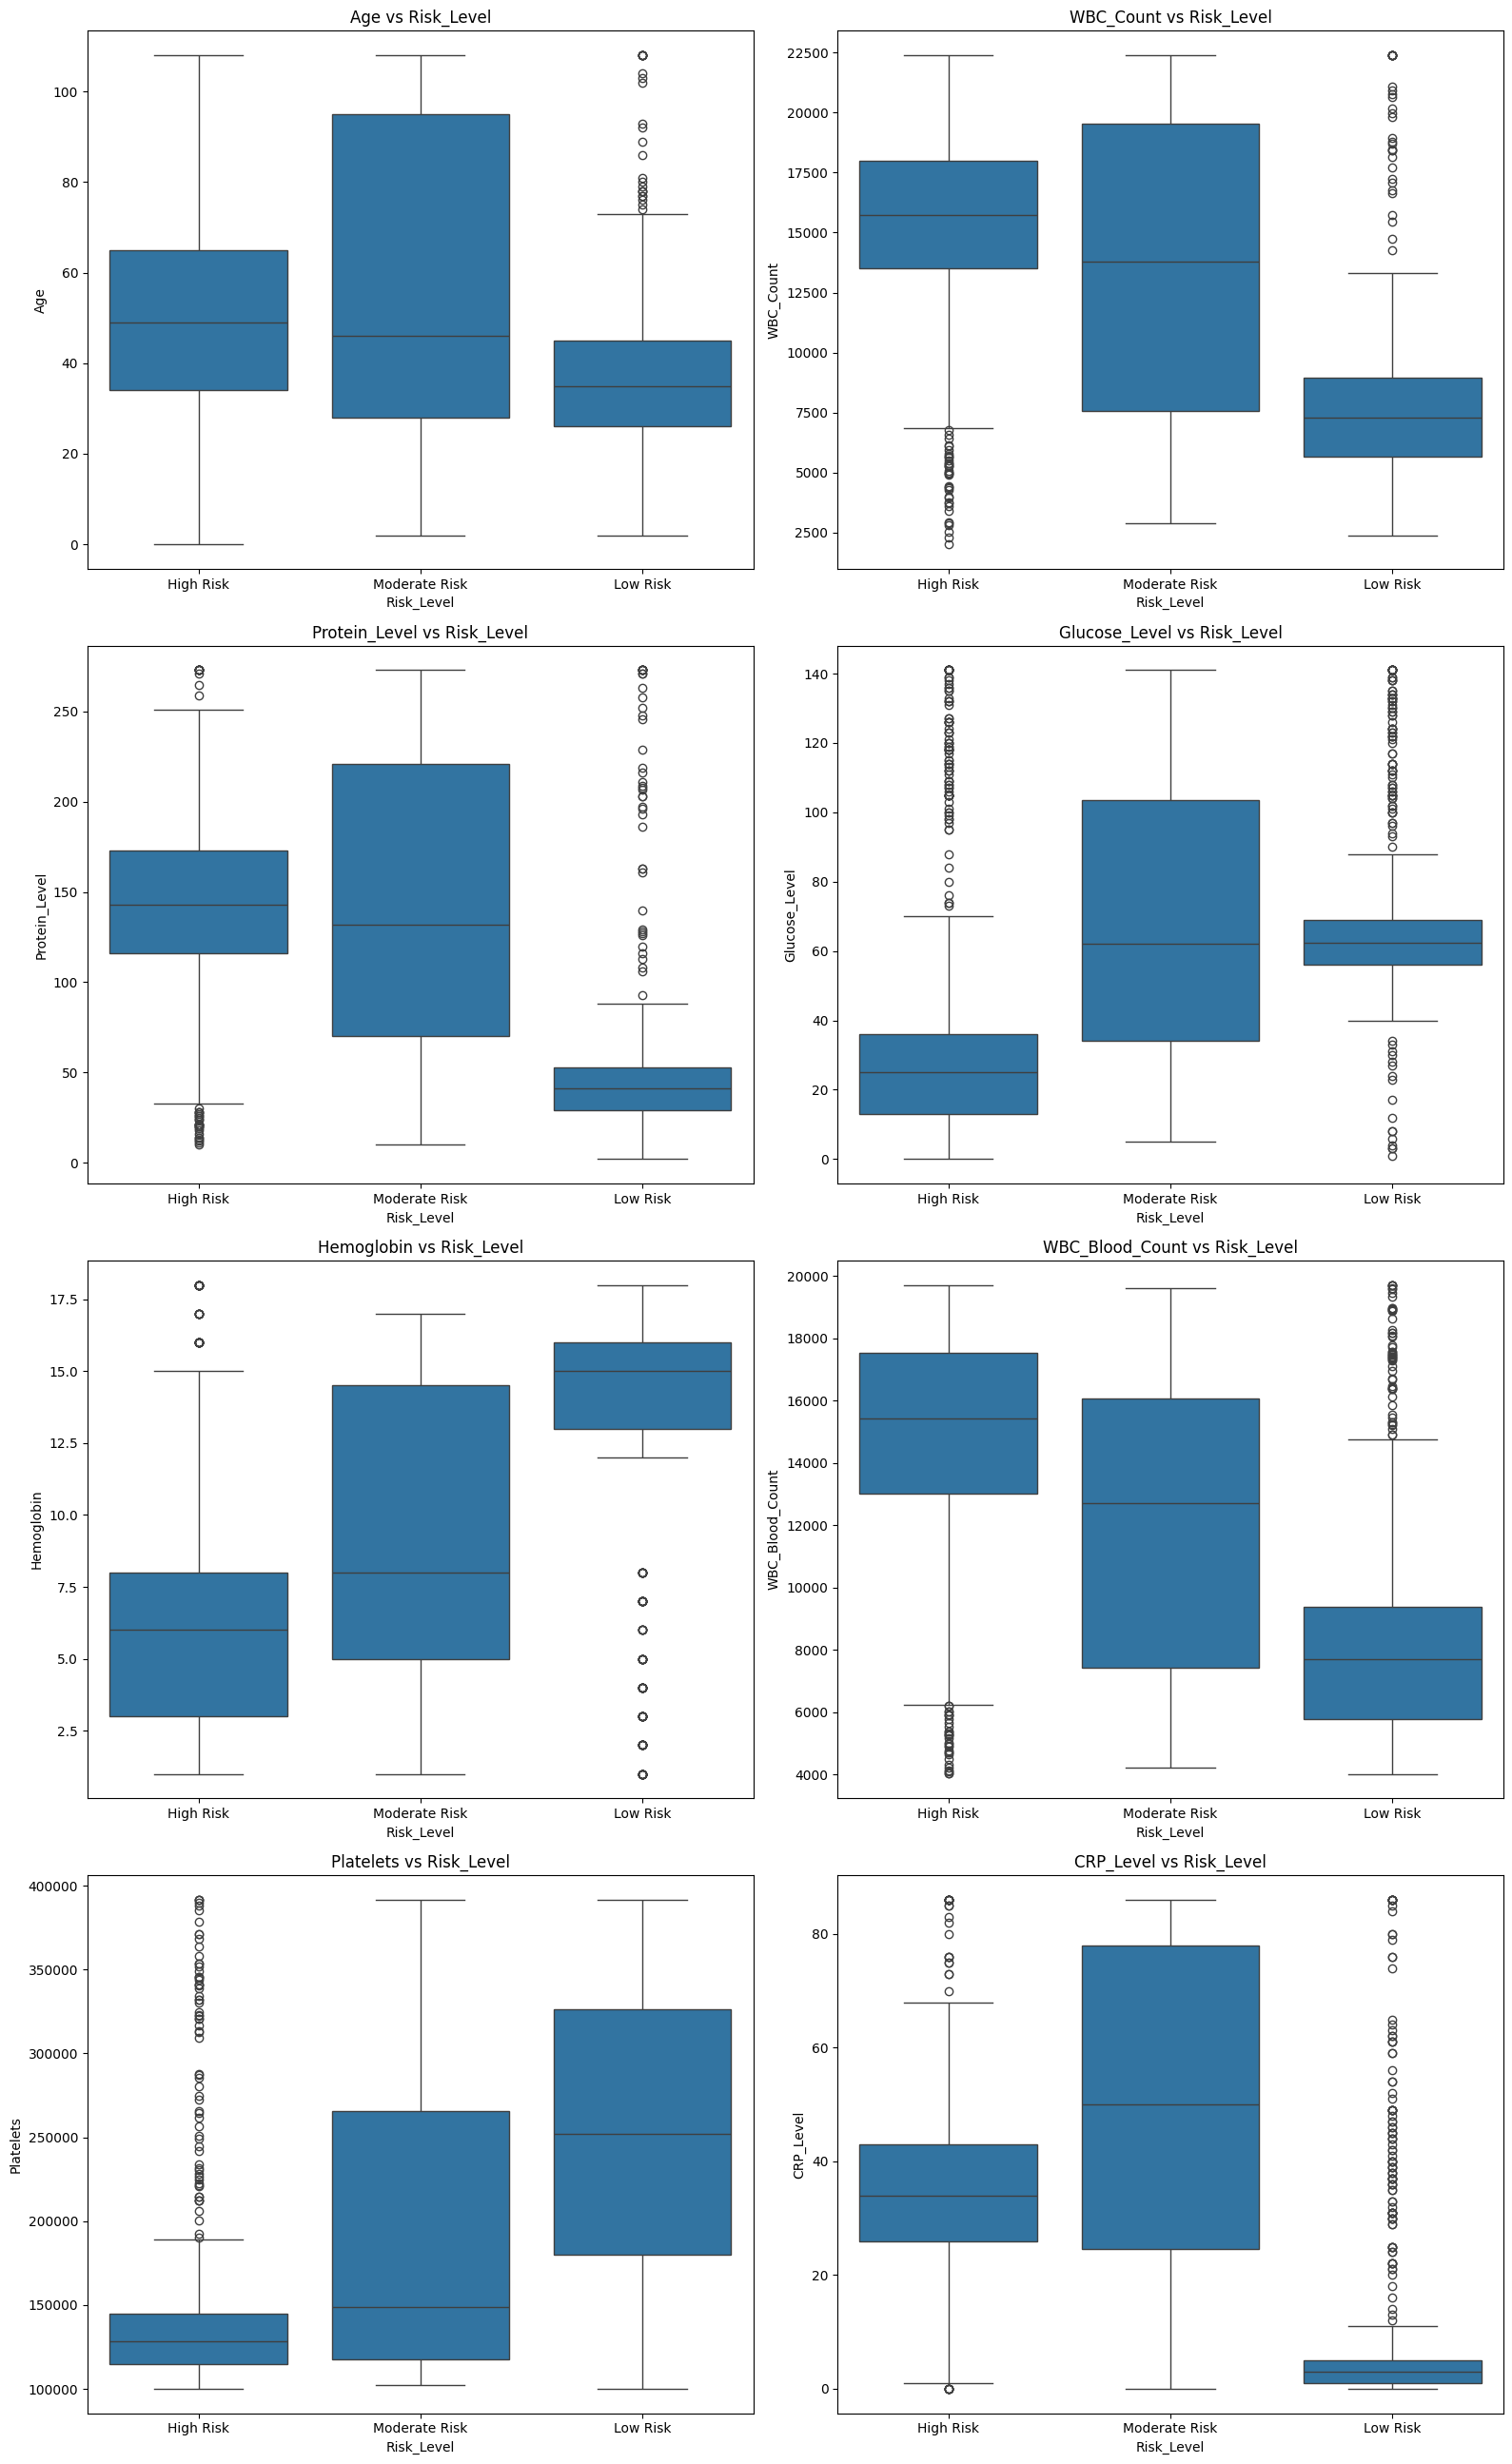

In [77]:
plt.figure(figsize=(16, 26))  

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=df2, x='Risk_Level', y=col)
    plt.title(f'{col} vs Risk_Level')
    plt.xlabel('Risk_Level')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

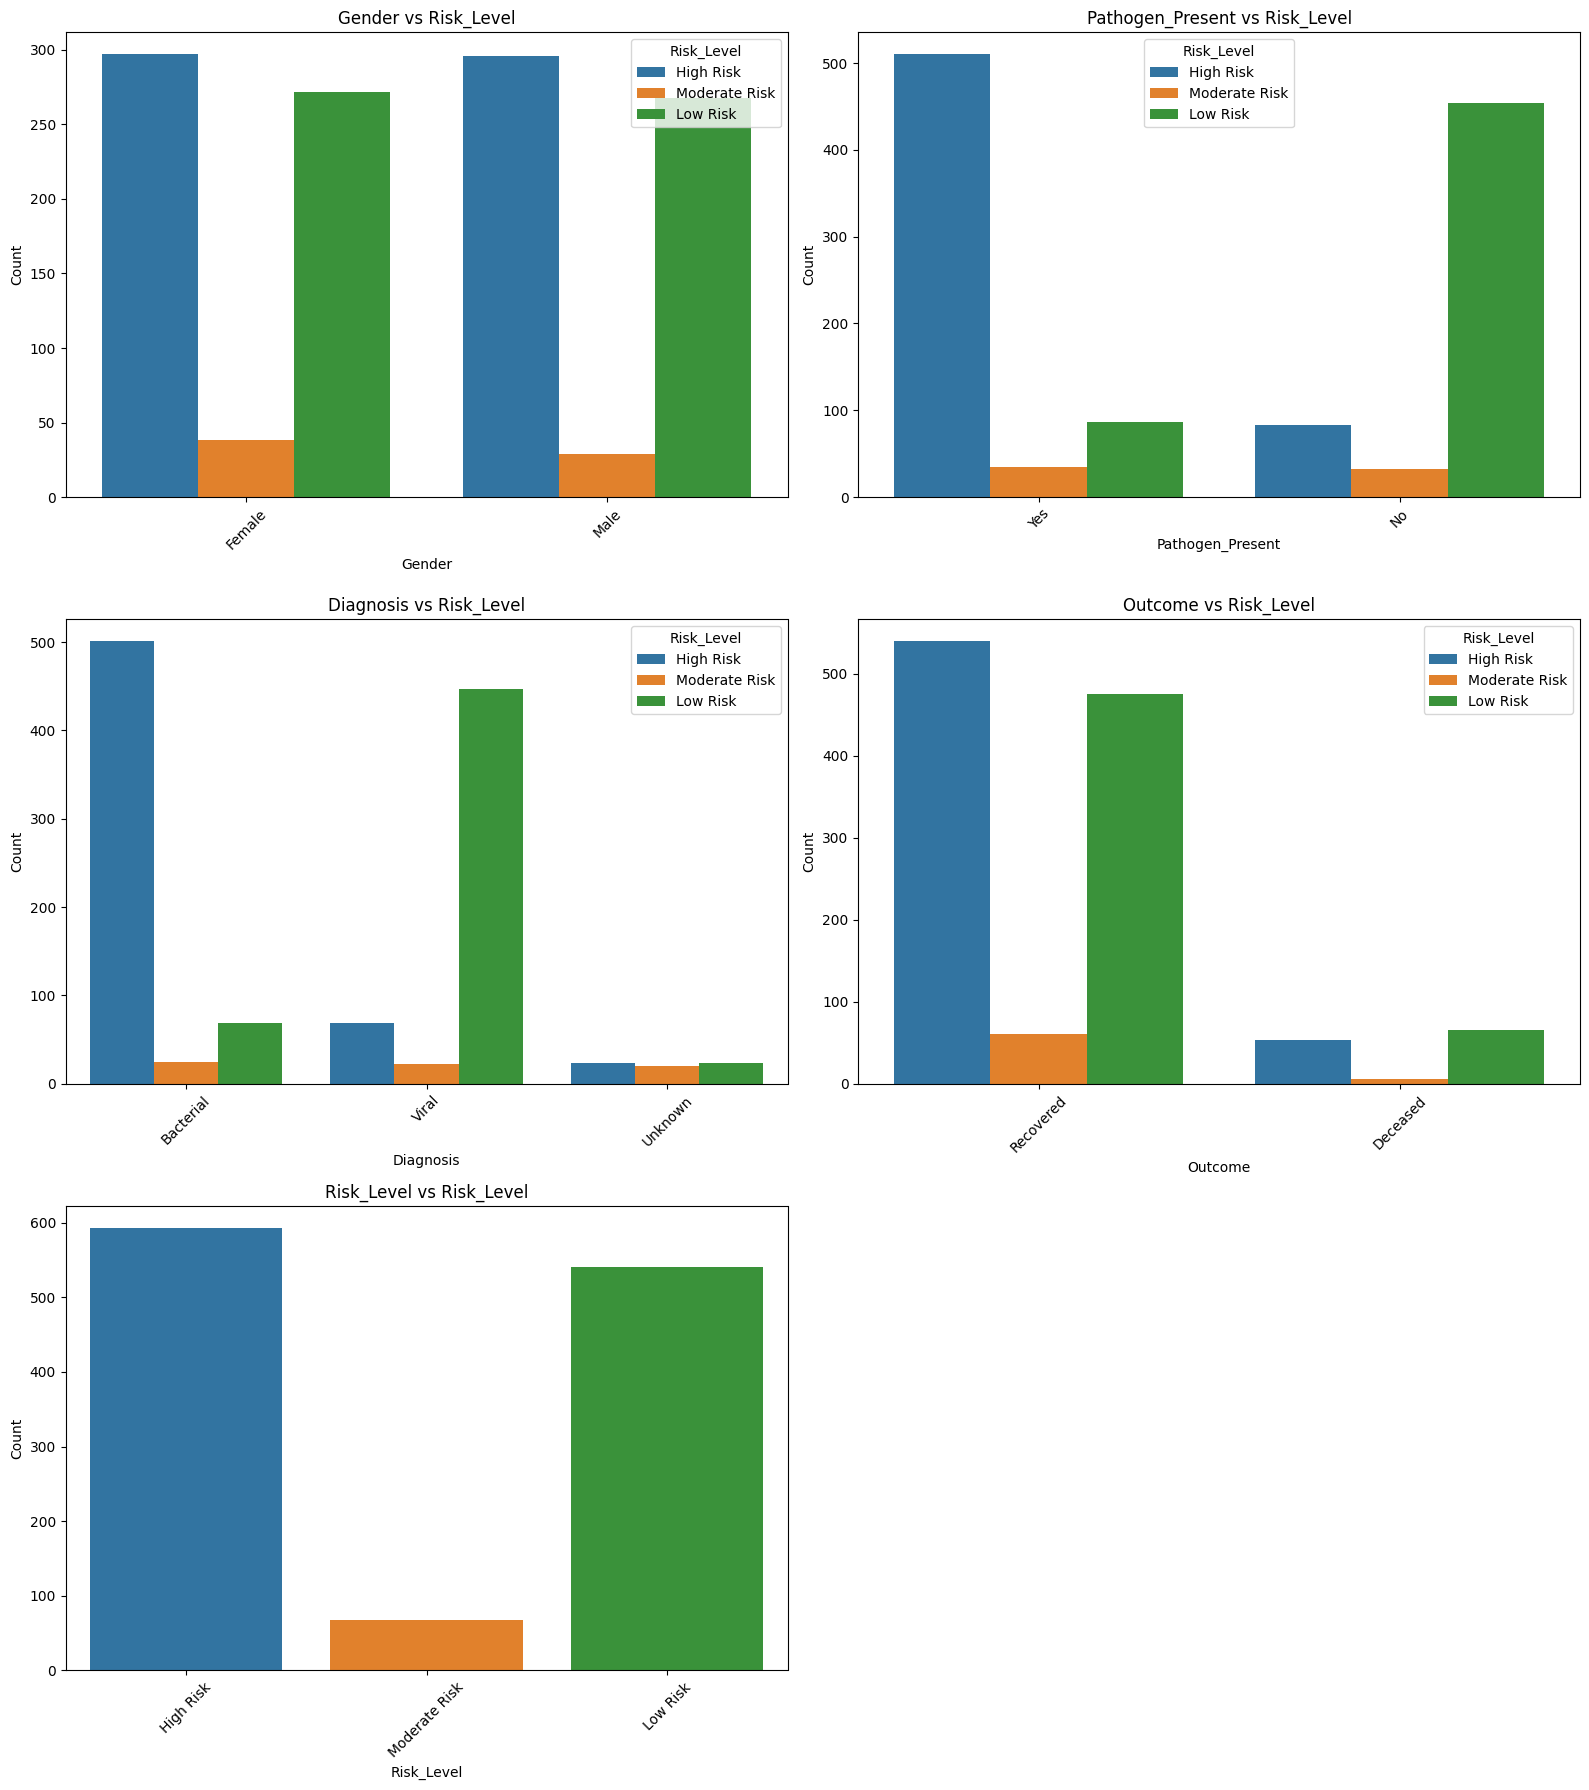

In [79]:
plt.figure(figsize=(16, 18))

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=df2, x=col, hue='Risk_Level')
    plt.title(f'{col} vs Risk_Level')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [83]:
df.to_csv("raw_dataset.csv", index=False)
df1.to_csv("copy_of_raw_dataset.csv", index=False)
df2.to_csv("capped_at_98_percentile_dataset.csv", index=False)

In [84]:
df2 = df2.drop(columns=['Patient_ID']) 

In [93]:
df2_encoded = df2.copy()

le = LabelEncoder()
for col in categorical_cols:
    df2_encoded[col] = le.fit_transform(df2_encoded[col])

In [100]:
x = df2_encoded.drop(columns=['Risk_Level'])
y = df2_encoded['Risk_Level']

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(x, y)

feature_importance_df2 = pd.DataFrame({
    'Features': x.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df2)

            Features  Importance
4      Glucose_Level    0.220745
2          WBC_Count    0.207710
3      Protein_Level    0.148814
11         CRP_Level    0.091152
6          Diagnosis    0.079909
9    WBC_Blood_Count    0.059502
10         Platelets    0.056415
8         Hemoglobin    0.054679
0                Age    0.040421
5   Pathogen_Present    0.032550
1             Gender    0.005336
7            Outcome    0.002768


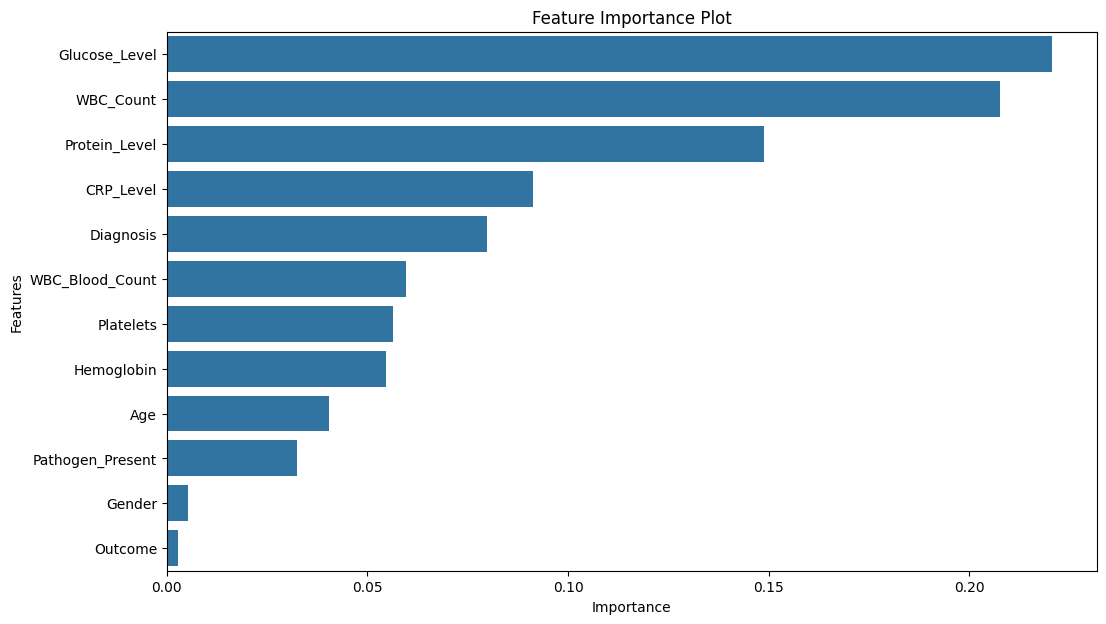

In [105]:
plt.figure(figsize=(12, 7))
sns.barplot(x ='Importance', y = 'Features', data=feature_importance_df2)
plt.title('Feature Importance Plot')
plt.show()

In [107]:
selected_features = ['Glucose_Level', 'WBC_Count', 'Protein_Level', 
                     'CRP_Level', 'Platelets', 'Hemoglobin']

X = df2_encoded[selected_features]
y = df2_encoded['Risk_Level']

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [109]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Random Forest Accuracy: 0.9041666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       119
           1       0.93      0.93      0.93       108
           2       0.55      0.46      0.50        13

    accuracy                           0.90       240
   macro avg       0.80      0.77      0.78       240
weighted avg       0.90      0.90      0.90       240


Confusion Matrix:
 [[111   4   4]
 [  7 100   1]
 [  3   4   6]]


In [110]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.9041666666666667

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.93      0.93       119
           1       0.90      0.94      0.92       108
           2       0.71      0.38      0.50        13

    accuracy                           0.90       240
   macro avg       0.84      0.75      0.78       240
weighted avg       0.90      0.90      0.90       240


Confusion Matrix:
 [[111   6   2]
 [  7 101   0]
 [  3   5   5]]


C:\Users\vinay\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:51:40] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [111]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [112]:
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)

y_pred_log = log_reg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))

Logistic Regression Accuracy: 0.8541666666666666

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       119
           1       0.86      0.92      0.89       108
           2       0.33      0.15      0.21        13

    accuracy                           0.85       240
   macro avg       0.69      0.65      0.66       240
weighted avg       0.84      0.85      0.84       240


Confusion Matrix:
 [[104  13   2]
 [  7  99   2]
 [  8   3   2]]


In [113]:
df.to_csv("raw_dataset.csv", index=False)
df1.to_csv("copy_of_raw_dataset.csv", index=False)
df2.to_csv("capped_at_98_percentile_dataset.csv", index=False)
df2_encoded.to_csv("encoded_dataset.csv", index=False)